# Function Testing Notebook - Joseph

This notebook is meant to test external-facing functions to ensure they are working as expected.

A dedicated test_all_functions.py with unit testing might be better, but this is a good benchmark

In [18]:
import os
import sys
from pathlib import Path
import time
import tempfile
import logging

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import mne
from dask_jobqueue import SLURMCluster
from dask.distributed import Client, LocalCluster

In [19]:
# packageroot = Path('../../').resolve()
packageroot = Path('../../').resolve()
print(packageroot)
sys.path.append(str(packageroot))

from pythoneeg import core
from pythoneeg import visualization
from pythoneeg import constants

print(core.__all__)
# print(visualization.__all__)
# print(dir(constants))

/Users/josephdong/PyEEG
['DDFBinaryMetadata', 'LongRecordingOrganizer', 'convert_ddfcolbin_to_ddfrowbin', 'convert_ddfrowbin_to_si', 'convert_units_to_multiplier', 'convert_colpath_to_rowpath', 'filepath_to_index', 'is_day', 'set_temp_directory', 'get_temp_directory', 'LongRecordingAnalyzer', 'MountainSortAnalyzer', 'FragmentAnalyzer']


In [20]:
tempdir = Path('../../tmp').resolve()
print(tempdir)
core.set_temp_directory(tempdir)

/Users/josephdong/PyEEG/tmp


In [21]:
data_folder = Path('./test-data').resolve()
lrec = core.LongRecordingOrganizer(base_folder_path= data_folder / 'A10 KO 12_13_2023',
                                    truncate=3)
lrec.convert_colbins_to_rowbins(overwrite=False)
lrec.convert_rowbins_to_rec()

2025-03-28 02:59:57,429 - WARNING - Row-major binary files already exist! Skipping existing files


/Users/josephdong/PyEEG/pythoneeg/core/core.py:153: UserWarning: truncate = True. Only the first 3 files of each animal will be used
  warnings.warn(f"truncate = True. Only the first {self.n_truncate} files of each animal will be used")


In [22]:
Path('./test-wars/A5').resolve()

PosixPath('/Users/josephdong/PyEEG/notebooks/tests/test-wars/A5')

In [23]:
# Set up logger with detailed formatting
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG, stream=sys.stdout, force=True)
logger = logging.getLogger()


In [24]:
cluster = LocalCluster()
display(cluster)

2025-03-28 02:59:57,491 - DEBUG - Using selector: KqueueSelector


/Users/josephdong/PyEEG/.venv/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 58620 instead
  warnings.warn(


LocalCluster(65012c3e, 'tcp://127.0.0.1:58621', workers=11, threads=11, memory=36.00 GiB)

In [25]:
# %%script true
# animal_ids = ['A5', 'A10', 'F22', 'G25', 'G26', 'N21', 'N22', 'N23', 'N24', 'N25']
# animal_ids = ['A5']
animal_ids = ['A10']
# animal_ids = ['F22']
# animal_ids = ['G25']
base_folder = Path('./test-data').resolve()
# base_folder = Path('/mnt/isilon/marsh_single_unit/PythonEEG Data Bins').resolve()
for animal_id in animal_ids:
    ao = visualization.AnimalOrganizer(base_folder, animal_id, mode="concat", assume_from_number=True, truncate=False)
    ao.convert_colbins_to_rowbins(overwrite=False)
    ao.convert_rowbins_to_rec() # parallelization breaks if not enough memory

    # with Client(cluster) as client:
    #     client.upload_file(str(packageroot / 'pythoneeg.zip'))
    #     display(client)
    #     print("running war")
    #     ao.convert_rowbins_to_rec(multiprocess_mode='dask') # paralleization breaks if not enough memory
    #     war = ao.compute_windowed_analysis(['all'], multiprocess_mode='dask')
    #     war.save_pickle_and_json(Path(f'./test-wars-full/{animal_id}').resolve())

    # with Client(cluster) as client:
    #     client.upload_file(str(packageroot / 'pythoneeg.zip'))
    #     display(client)
    #     print("running sar")
    #     sar = ao.compute_spike_analysis(multiprocess_mode='dask')

Converting column bins to row bins:   0%|          | 0/1 [00:00<?, ?it/s]

2025-03-28 02:59:58,342 - WARNING - Row-major binary files already exist! Skipping existing files


Converting row bins to recs: 100%|██████████| 1/1 [00:00<00:00, 23.25it/s]


In [26]:
war = visualization.WindowAnalysisResult.load_pickle_and_json(Path('./test-wars/F22').resolve())

2025-03-28 02:59:58,399 - WARNING - Intan Input (1)/PortD D-009 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:58,400 - WARNING - Intan Input (1)/PortD D-010 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:58,400 - WARNING - Intan Input (1)/PortD D-012 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:58,400 - WARNING - Intan Input (1)/PortD D-014 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:58,400 - WARNING - Intan Input (1)/PortD D-015 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:58,401 - WARNING - Intan Input (1)/PortD D-016 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:58,401 - WARNING - Intan Input (1)/PortD D-017 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:58,401 - WARNING - Intan

In [27]:
war.get_result(['all'], allow_missing=True).head(3)

,index,animalday,animal,day,genotype,duration,endfile,timestamp,isday,rms,ampvar,psd,psdtotal,psdband,psdslope,cohere,pcorr
0,0,F22 KO Dec-12-2023,F22,2023-12-12,KO,4.0,None,2023-12-12 12:49:13.560,True,"[324.54126, 123.114975, 89.73863, 199.99384, 3...","[98233.96, 14860.108, 7970.6455, 37275.63, 151...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[2990.8171, 9656.856, 4898.069, 6713.2295, 427...","{'delta': [2371.017, 3296.126, 1211.0659, 2644...","[(-1.6245375548094994, 3.0368814205586463), (-...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1,F22 KO Dec-12-2023,F22,2023-12-12,KO,4.0,None,2023-12-12 12:49:17.560,True,"[33.98205, 98.85395, 73.50662, 72.37029, 407.4...","[1154.7555, 9768.596, 5399.9824, 5234.5786, 16...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[617.85815, 8765.923, 4538.3516, 4057.7214, 14...","{'delta': [190.04459, 1800.4429, 548.10364, 11...","[(-1.2709592689560614, 2.4014942712763423), (-...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2,F22 KO Dec-12-2023,F22,2023-12-12,KO,4.0,None,2023-12-12 12:49:21.560,True,"[39.47052, 100.149216, 70.8411, 86.555595, 620...","[1557.7693, 10023.685, 5018.3926, 7481.013, 38...","([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...","[808.93463, 7760.562, 3900.8845, 4248.7896, 79...","{'delta': [306.9735, 2821.0764, 938.7143, 2116...","[(-1.4739850325245956, 2.662434533055389), (-1...","{'delta': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


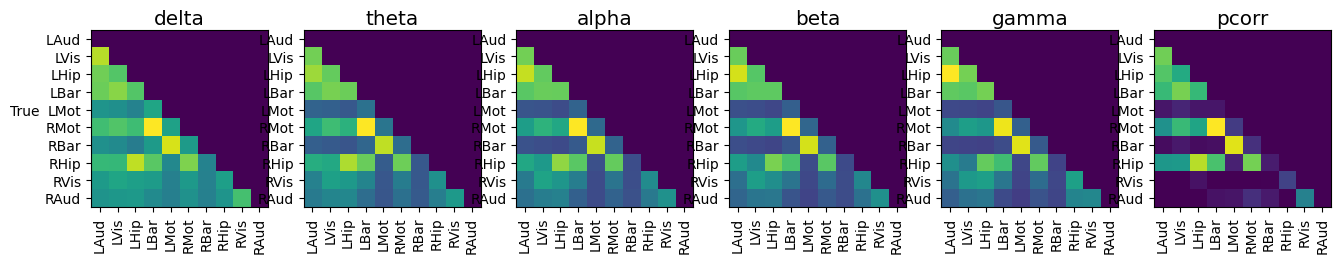

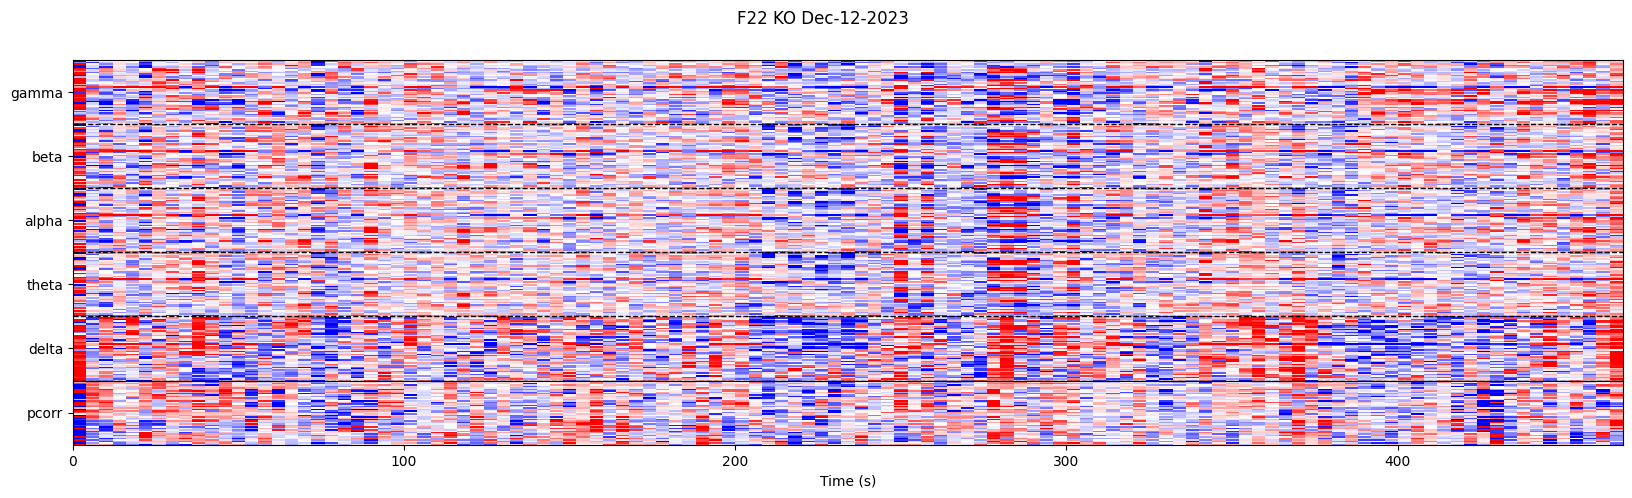

/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/animal.py:325: RuntimeWarning: divide by zero encountered in log10
  ax[0, i].plot(freqs, 10**(b + m * np.log10(freqs)), c=f'C{j}', alpha=0.75)


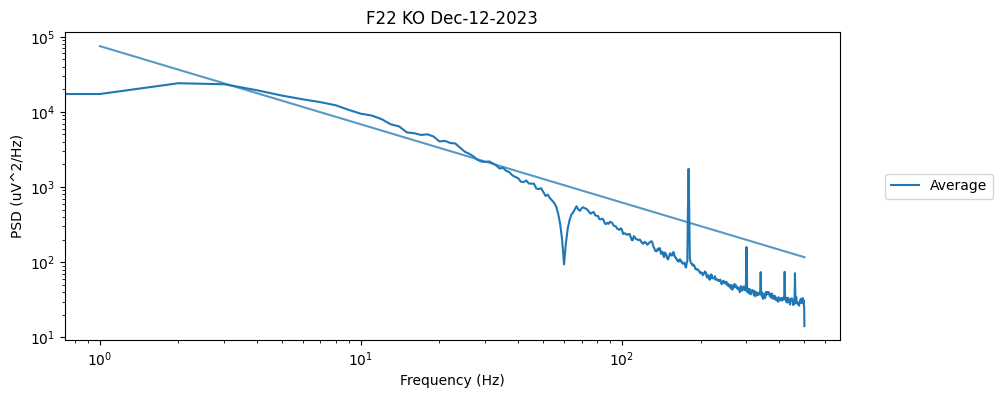

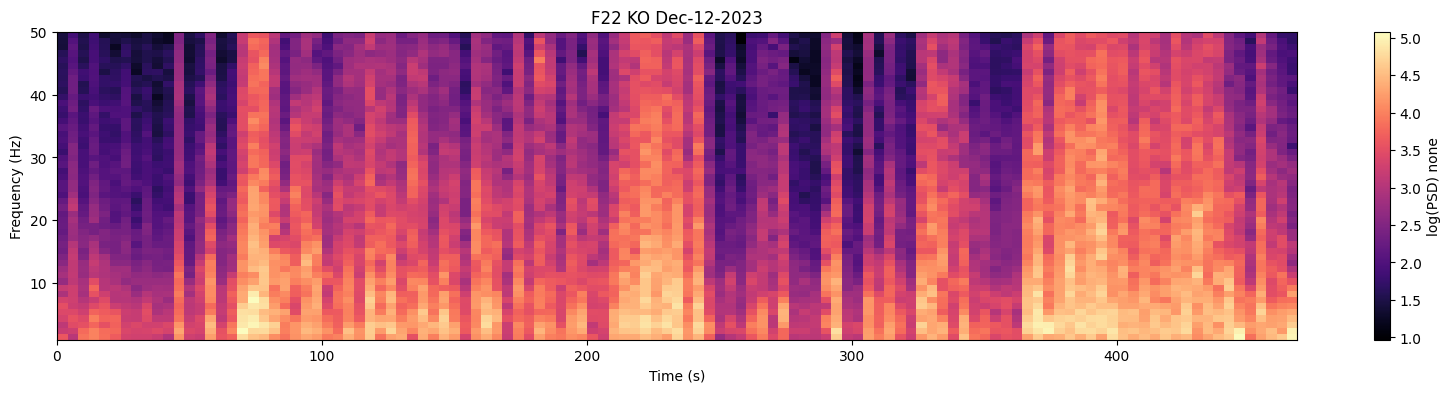

In [28]:
logger.setLevel(logging.WARNING)
ap = visualization.AnimalPlotter(war)
ap.plot_coherecorr_matrix(['isday'], bands=None, figsize=(16,5), cmap='viridis')
# ap.plot_coherecorr_diff(['isday'], bands=None, figsize=(16,5))
# ap.plot_linear_temporal(figsize=(20, 5), score_type='z', lw=1, channels=[0, 1])
# ap.plot_linear_temporal(['isday'], figsize=(20, 5), score_type='z', lw=1, channels=[0, 1, 2, 3])

# ap.plot_coherecorr_spectral(['isday'], figsize=(20, 5), score_type='center')

ap.plot_coherecorr_spectral(figsize=(20, 5), score_type='center')
ap.plot_psd_histogram(figsize=(10, 4), avg_channels=True, plot_type='loglog')
ap.plot_psd_spectrogram(figsize=(20, 4), mode='none')

In [29]:
logger.setLevel(logging.DEBUG)
wars = []
animal_ids = ['A10', 'F22']
for i, animal_id in enumerate(animal_ids):
    war = visualization.WindowAnalysisResult.load_pickle_and_json(Path(f'./test-wars/{animal_id}').resolve())
    # logging.critical(war.result.iloc[0]['pcorr'])
    # war = war.filter_all()
    # logging.critical(war.result.iloc[0]['pcorr'])
    if i == 1:
        # wrangle = war.result.copy()
        war_filt = war.filter_all(reject_channels=['LMot', 'RBar'], inplace=False)
        # wranglefilt = war_filt.result.copy()
        war = war_filt
    wars.append(war)
ep = visualization.ExperimentPlotter(wars)


2025-03-28 02:59:59,166 - WARNING - Intan Input (1)/PortC C-009 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:59,166 - WARNING - Intan Input (1)/PortC C-010 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:59,166 - WARNING - Intan Input (1)/PortC C-012 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:59,167 - WARNING - Intan Input (1)/PortC C-014 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:59,167 - WARNING - Intan Input (1)/PortC C-015 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:59,167 - WARNING - Intan Input (1)/PortC C-016 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:59,167 - WARNING - Intan Input (1)/PortC C-017 does not match name aliases. Assuming alias from number in channel name.
2025-03-28 02:59:59,167 - WARNING - Intan

2025-03-28 02:59:59,200 - INFO - pulling rms
2025-03-28 02:59:59,202 - DEBUG - groups: ['A10', 'F22']
2025-03-28 02:59:59,203 - DEBUG - vals.shape: (31, 10)
2025-03-28 02:59:59,204 - DEBUG - vals.shape: (117, 10)
2025-03-28 02:59:59,208 - DEBUG - groups: ['A10', 'F22']
2025-03-28 02:59:59,208 - DEBUG - vals.shape: (31, 10)
2025-03-28 02:59:59,209 - DEBUG - vals.shape: (117, 10)
2025-03-28 02:59:59,393 - INFO - pulling ampvar
2025-03-28 02:59:59,395 - DEBUG - groups: ['A10', 'F22']
2025-03-28 02:59:59,395 - DEBUG - vals.shape: (31, 10)
2025-03-28 02:59:59,396 - DEBUG - vals.shape: (117, 10)
2025-03-28 02:59:59,398 - DEBUG - groups: ['A10', 'F22']
2025-03-28 02:59:59,399 - DEBUG - vals.shape: (31, 10)
2025-03-28 02:59:59,399 - DEBUG - vals.shape: (117, 10)
2025-03-28 02:59:59,546 - INFO - pulling psdtotal
2025-03-28 02:59:59,547 - DEBUG - groups: ['A10', 'F22']
2025-03-28 02:59:59,547 - DEBUG - vals.shape: (31, 10)
2025-03-28 02:59:59,548 - DEBUG - vals.shape: (117, 10)
2025-03-28 02:59:

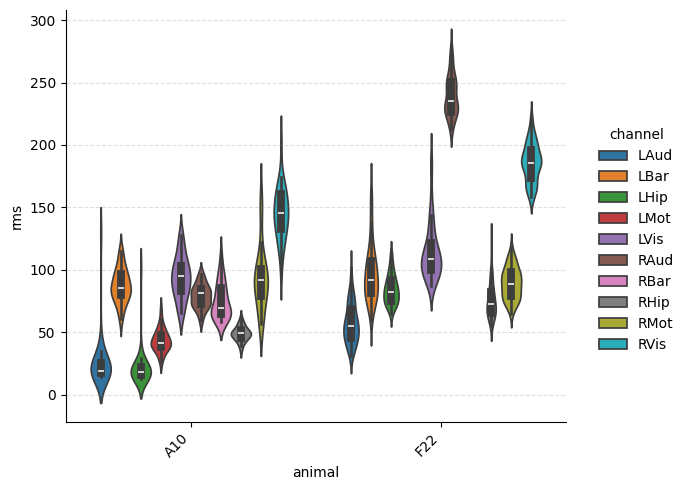

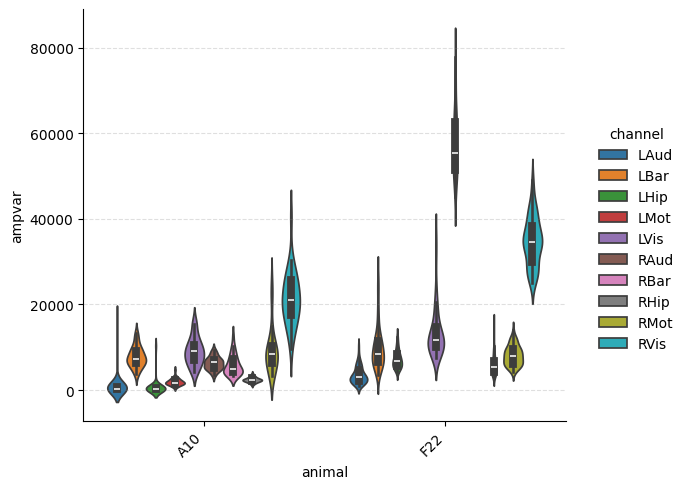

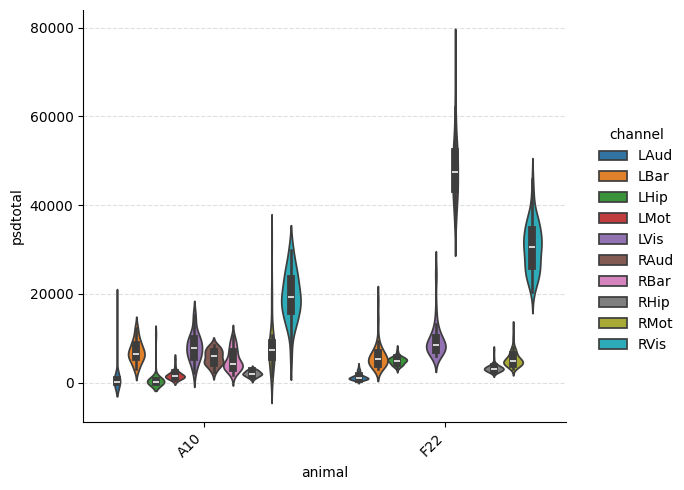

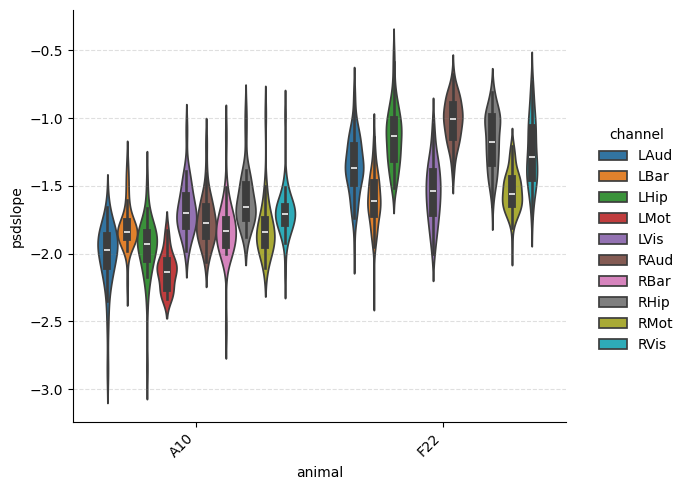

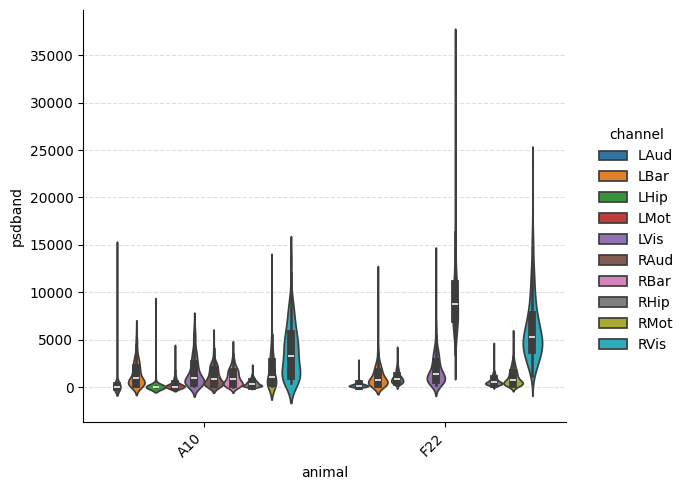

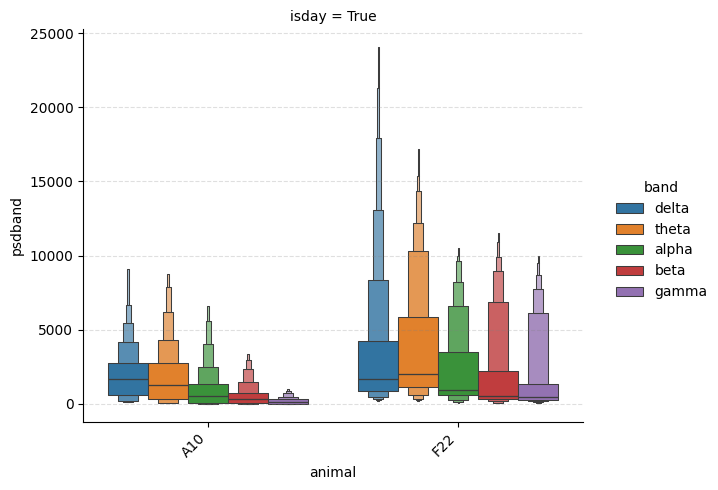

In [30]:
for feat in constants.LINEAR_FEATURE + ['psdband']:
    logging.info(f'pulling {feat}')
    df = ep._pull_timeseries_dataframe(feat, 'animal')
    # display(df)
    # ep.plot_boxplot_2(feat, ['genotype', 'animalday'], collapse_channels=False)
    ep.plot_catplot(feat, 'animal', kind='violin')

ep.plot_catplot('psdband', ['animal', 'isday', 'animalday'], 
                x='animal',
                col='isday',
                hue='band',
                kind='boxen',
                collapse_channels=False,
                catplot_params={'showfliers': False})

2025-03-28 03:00:00,611 - INFO - pulling cohere
2025-03-28 03:00:00,615 - DEBUG - groups: [('A10', True), ('F22', True)]
2025-03-28 03:00:00,616 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-03-28 03:00:00,617 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-03-28 03:00:00,621 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-03-28 03:00:00,621 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-03-28 03:00:00,628 - DEBUG - groups: [('A10', True), ('F22', True)]
2025-03-28 03:00:00,628 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-03-28 03:00:00,629 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-03-28 03:00:00,632 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-03-28 03:00:00,632 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-03-28 03:00:00,929 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x1365f46d0>
2025-03-28 03:00:00,944 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x137c6cee0>
2025-03-28 03:00:00,954 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x141ac8dc0>
2025-03-28 03:0

/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:556: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:556: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:556: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:556: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:556: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)


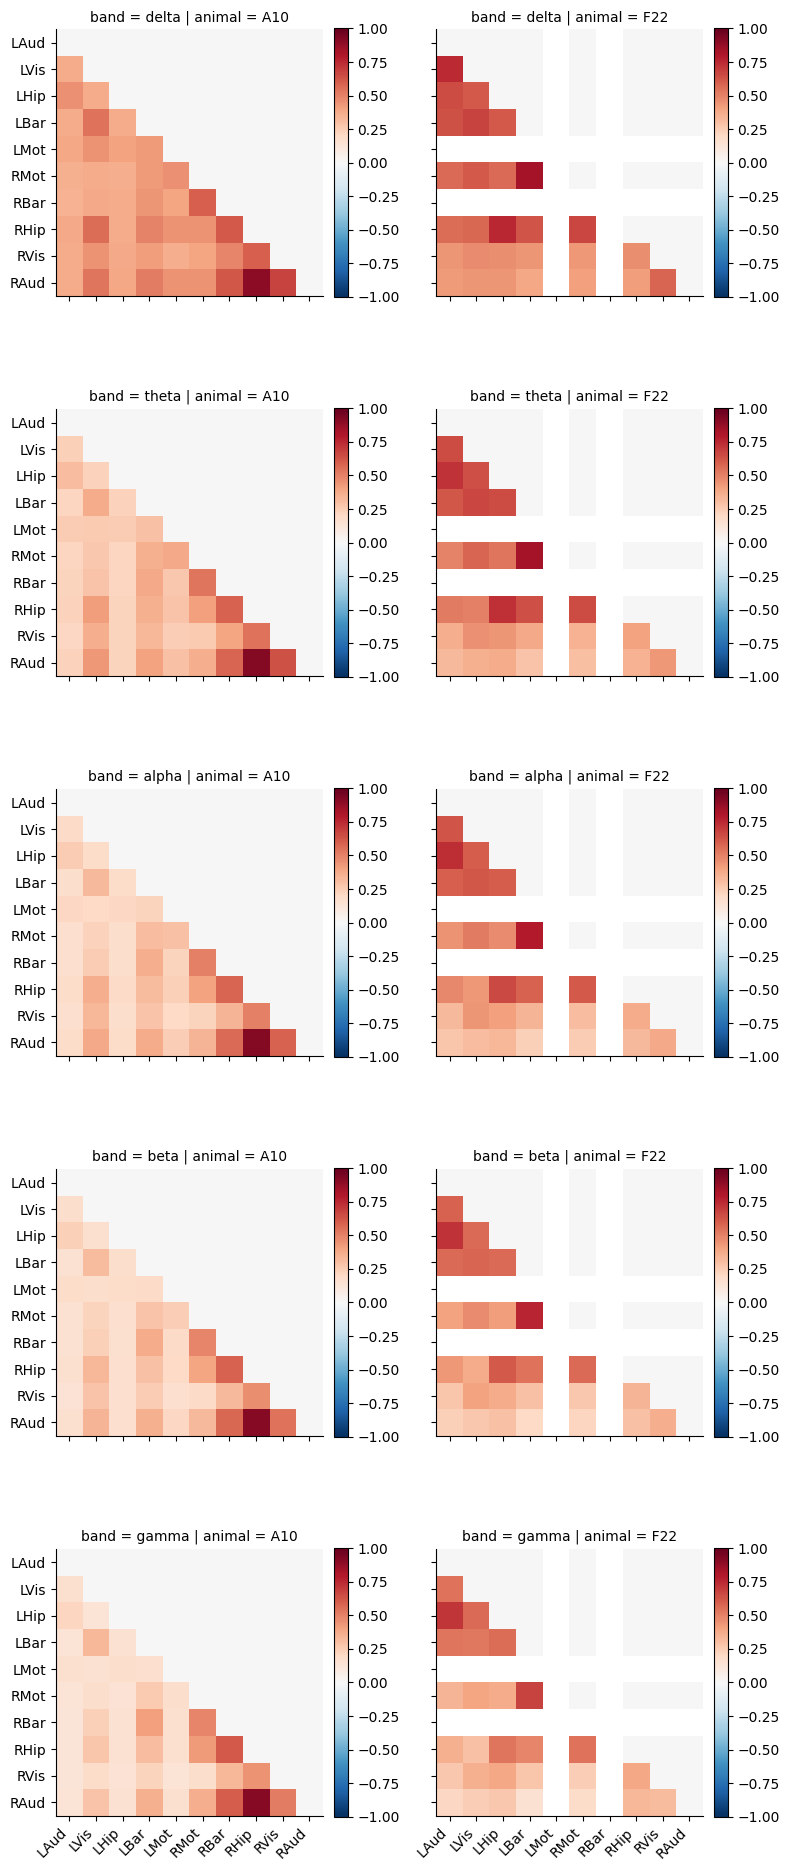

In [31]:
for feat in ['cohere']:
    logging.info(f'pulling {feat}')
    df = ep._pull_timeseries_dataframe(feat, ['animal', 'isday'])
    ep.plot_2d_feature_2(feat, ['animal', 'isday'], row='band')


2025-03-28 03:14:18,045 - DEBUG - groups: [('KO', True)]
2025-03-28 03:14:18,047 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-03-28 03:14:18,047 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-03-28 03:14:18,053 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-03-28 03:14:18,056 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-03-28 03:14:18,096 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x144031bd0>
2025-03-28 03:14:18,133 - DEBUG - groups: ['KO']
2025-03-28 03:14:18,134 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-03-28 03:14:18,134 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-03-28 03:14:18,137 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-03-28 03:14:18,138 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-03-28 03:14:18,250 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x140a52710>
2025-03-28 03:14:18,264 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x1413d6800>
2025-03-28 03:14:18,276 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x137c888e0>
2025-0

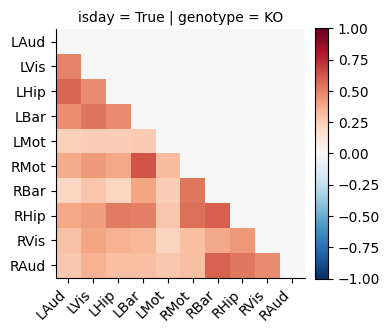

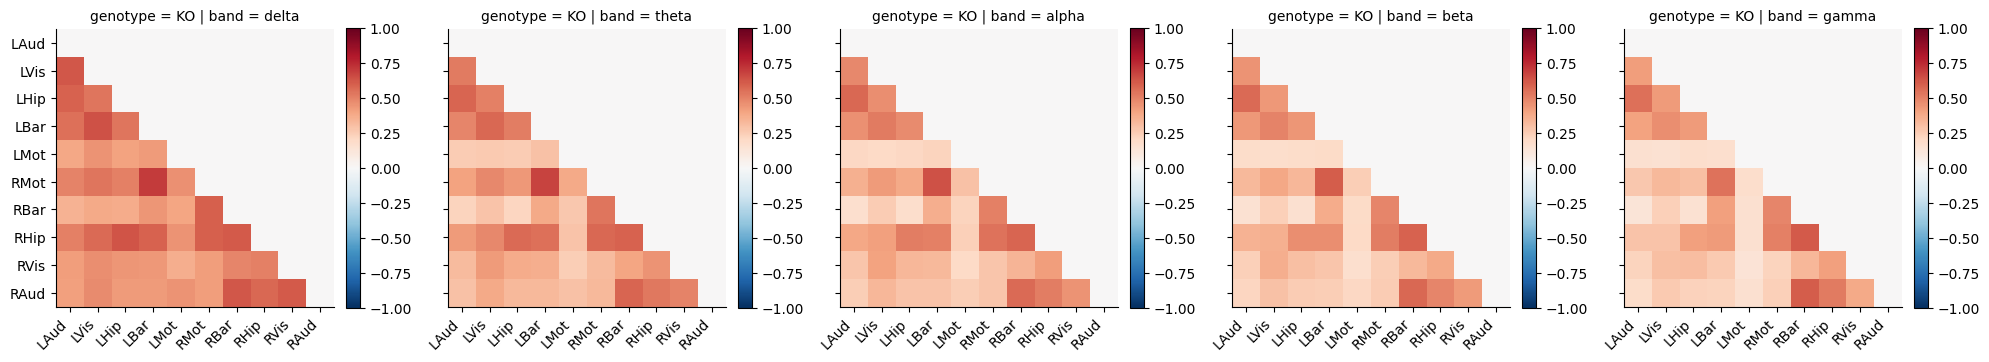

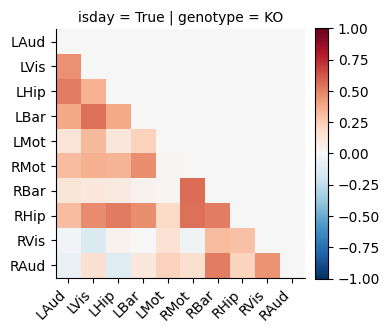

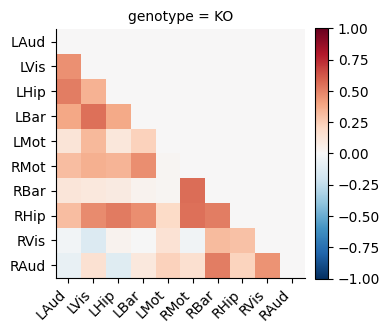

In [37]:
ep.plot_2d_feature_2('cohere', groupby=['genotype', 'isday'])
ep.plot_2d_feature_2('cohere', groupby='genotype', col='band', row='genotype')

ep.plot_2d_feature_2('pcorr', groupby=['genotype', 'isday'])
ep.plot_2d_feature_2('pcorr', groupby='genotype')

2025-03-28 03:00:12,155 - DEBUG - groups: ['KO']
2025-03-28 03:00:12,156 - DEBUG - vals.shape: (31, 10)
2025-03-28 03:00:12,158 - DEBUG - vals.shape: (117, 10)
2025-03-28 03:00:12,304 - DEBUG - groups: ['KO']
2025-03-28 03:00:12,305 - DEBUG - vals.shape: (31,)
2025-03-28 03:00:12,305 - DEBUG - vals.shape: (117,)
2025-03-28 03:00:12,362 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:12,363 - DEBUG - vals.shape: (31, 10)
2025-03-28 03:00:12,364 - DEBUG - vals.shape: (117, 10)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:12,507 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:12,507 - DEBUG - vals.shape: (31,)
2025-03-28 03:00:12,508 - DEBUG - vals.shape: (117,)
2025-03-28 03:00:12,584 - DEBUG - groups: ['KO']
2025-03-28 03:00:12,584 - DEBUG - vals.shape: (31, 10)
2025-03-28 03:00:12,585 - DEBUG - vals.shape: (117, 10)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:12,740 - DEBUG - groups: ['KO']
2025-03-28 03:00:12,742 - DEBUG - vals.shape: (31,)
2025-03-28 03:00:12,743 - DEBUG - vals.shape: (117,)
2025-03-28 03:00:12,812 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:12,815 - DEBUG - vals.shape: (31, 10)
2025-03-28 03:00:12,816 - DEBUG - vals.shape: (117, 10)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:12,981 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:12,982 - DEBUG - vals.shape: (31,)
2025-03-28 03:00:12,983 - DEBUG - vals.shape: (117,)
2025-03-28 03:00:13,070 - DEBUG - groups: ['KO']
2025-03-28 03:00:13,070 - DEBUG - vals.shape: (31, 10)
2025-03-28 03:00:13,073 - DEBUG - vals.shape: (117, 10)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:13,254 - DEBUG - groups: ['KO']
2025-03-28 03:00:13,257 - DEBUG - vals.shape: (31,)
2025-03-28 03:00:13,258 - DEBUG - vals.shape: (117,)
2025-03-28 03:00:13,327 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:13,328 - DEBUG - vals.shape: (31, 10)
2025-03-28 03:00:13,329 - DEBUG - vals.shape: (117, 10)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:13,655 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:13,656 - DEBUG - vals.shape: (31,)
2025-03-28 03:00:13,657 - DEBUG - vals.shape: (117,)
2025-03-28 03:00:13,734 - DEBUG - groups: ['KO']
2025-03-28 03:00:13,735 - DEBUG - vals.shape: (31, 10)
2025-03-28 03:00:13,736 - DEBUG - vals.shape: (117, 10)
2025-03-28 03:00:13,859 - DEBUG - groups: ['KO']


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:13,860 - DEBUG - vals.shape: (31,)
2025-03-28 03:00:13,860 - DEBUG - vals.shape: (117,)
2025-03-28 03:00:13,923 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:13,923 - DEBUG - vals.shape: (31, 10)
2025-03-28 03:00:13,924 - DEBUG - vals.shape: (117, 10)
2025-03-28 03:00:14,052 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:14,053 - DEBUG - vals.shape: (31,)
2025-03-28 03:00:14,054 - DEBUG - vals.shape: (117,)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:14,124 - DEBUG - groups: ['KO']
2025-03-28 03:00:14,124 - DEBUG - vals.shape: (31, 10)
2025-03-28 03:00:14,125 - DEBUG - vals.shape: (117, 10)
2025-03-28 03:00:14,265 - DEBUG - groups: ['KO']
2025-03-28 03:00:14,265 - DEBUG - vals.shape: (31,)
2025-03-28 03:00:14,266 - DEBUG - vals.shape: (117,)
2025-03-28 03:00:14,335 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:14,335 - DEBUG - vals.shape: (31, 10)
2025-03-28 03:00:14,336 - DEBUG - vals.shape: (117, 10)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:14,493 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:14,494 - DEBUG - vals.shape: (31,)
2025-03-28 03:00:14,495 - DEBUG - vals.shape: (117,)
2025-03-28 03:00:14,570 - DEBUG - groups: ['KO']
2025-03-28 03:00:14,571 - DEBUG - vals.shape: (31, 10)
2025-03-28 03:00:14,572 - DEBUG - vals.shape: (117, 10)
2025-03-28 03:00:14,691 - DEBUG - groups: ['KO']
2025-03-28 03:00:14,691 - DEBUG - vals.shape: (31,)
2025-03-28 03:00:14,692 - DEBUG - vals.shape: (117,)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/Users/josephdong/PyEEG/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:14,752 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:14,753 - DEBUG - vals.shape: (31, 10)
2025-03-28 03:00:14,754 - DEBUG - vals.shape: (117, 10)
2025-03-28 03:00:14,903 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:14,904 - DEBUG - vals.shape: (31,)
2025-03-28 03:00:14,905 - DEBUG - vals.shape: (117,)
2025-03-28 03:00:14,979 - DEBUG - groups: ['KO']
2025-03-28 03:00:14,980 - DEBUG - vals.shape: (31, 10, 2)
2025-03-28 03:00:14,981 - DEBUG - vals.shape: (117, 10, 2)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:15,121 - DEBUG - groups: ['KO']
2025-03-28 03:00:15,122 - DEBUG - vals.shape: (31, 2)
2025-03-28 03:00:15,123 - DEBUG - vals.shape: (117, 2)
2025-03-28 03:00:15,185 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:15,185 - DEBUG - vals.shape: (31, 10, 2)
2025-03-28 03:00:15,186 - DEBUG - vals.shape: (117, 10, 2)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:15,360 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:15,361 - DEBUG - vals.shape: (31, 2)
2025-03-28 03:00:15,362 - DEBUG - vals.shape: (117, 2)
2025-03-28 03:00:15,479 - DEBUG - groups: ['KO']
2025-03-28 03:00:15,479 - DEBUG - vals.shape: (31, 10, 2)
2025-03-28 03:00:15,586 - DEBUG - vals.shape: (117, 10, 2)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:15,729 - DEBUG - groups: ['KO']
2025-03-28 03:00:15,730 - DEBUG - vals.shape: (31, 2)
2025-03-28 03:00:15,731 - DEBUG - vals.shape: (117, 2)
2025-03-28 03:00:15,801 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:15,802 - DEBUG - vals.shape: (31, 10, 2)
2025-03-28 03:00:15,803 - DEBUG - vals.shape: (117, 10, 2)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:15,950 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:15,951 - DEBUG - vals.shape: (31, 2)
2025-03-28 03:00:15,952 - DEBUG - vals.shape: (117, 2)
2025-03-28 03:00:16,028 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:16,029 - DEBUG - vals.shape: (31, 5)
2025-03-28 03:00:16,031 - DEBUG - vals.shape: (117, 5)
2025-03-28 03:00:16,132 - DEBUG - groups: ['KO']
2025-03-28 03:00:16,132 - DEBUG - vals.shape: (31, 5)
2025-03-28 03:00:16,134 - DEBUG - vals.shape: (117, 5)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-03-28 03:00:16,227 - DEBUG - groups: [('KO', True)]
2025-03-28 03:00:16,228 - DEBUG - vals.shape: (31, 5)
2025-03-28 03:00:16,229 - DEBUG - vals.shape: (117, 5)
2025-03-28 03:00:16,328 - DEBUG - groups: ['KO']
2025-03-28 03:00:16,329 - DEBUG - vals.shape: (31, 5)
2025-03-28 03:00:16,330 - DEBUG - vals.shape: (117, 5)


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:109: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


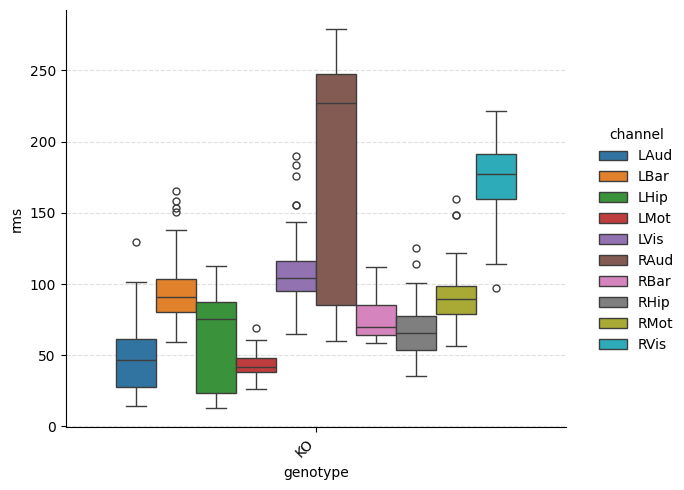

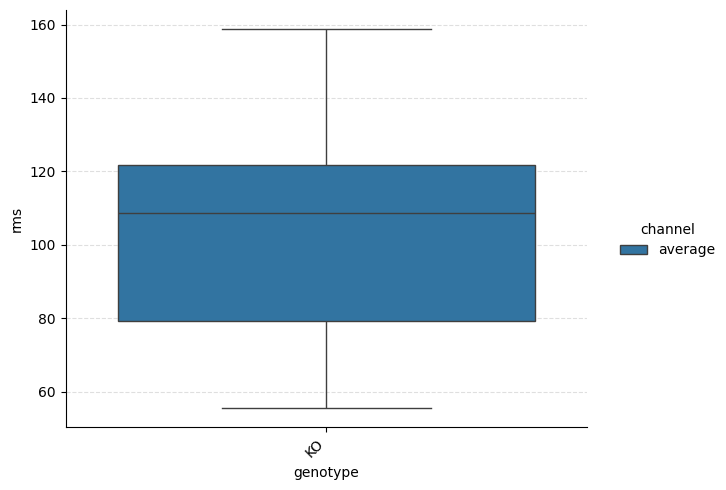

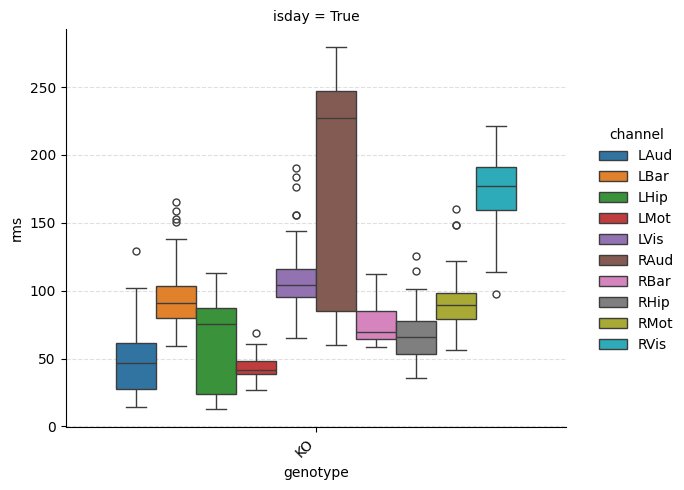

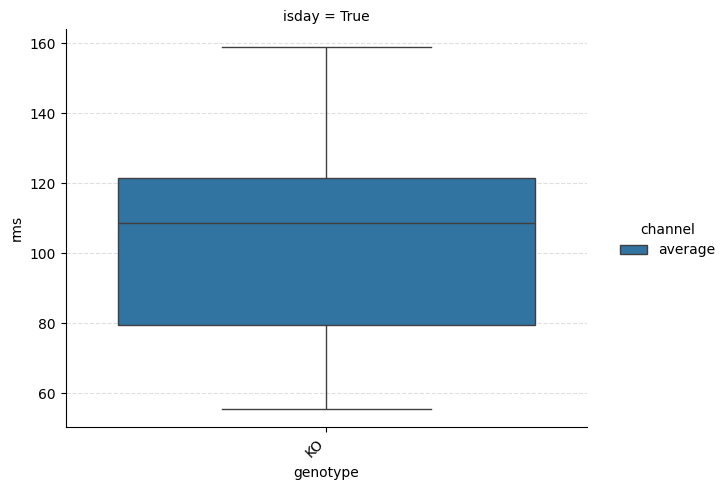

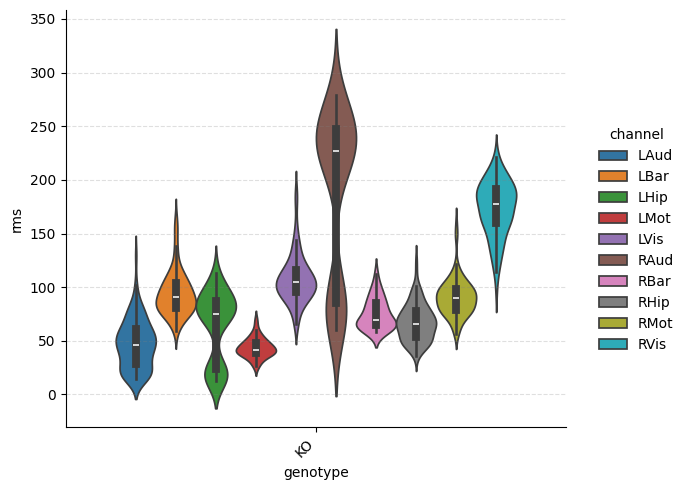

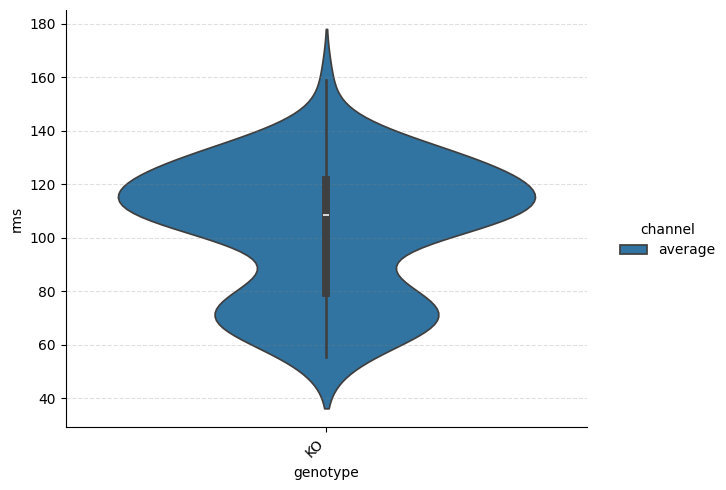

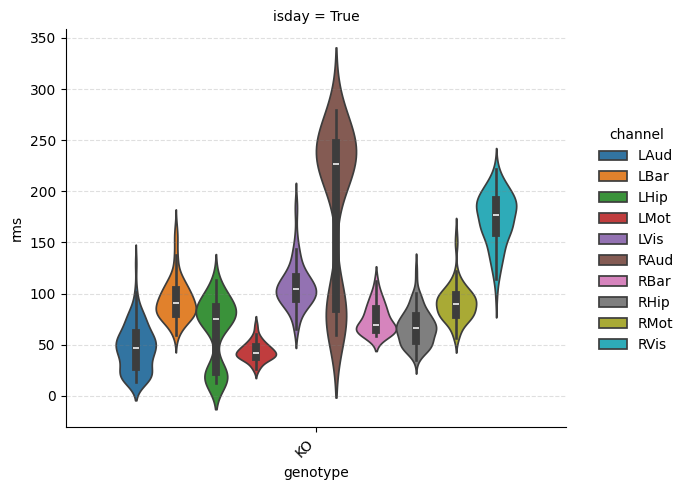

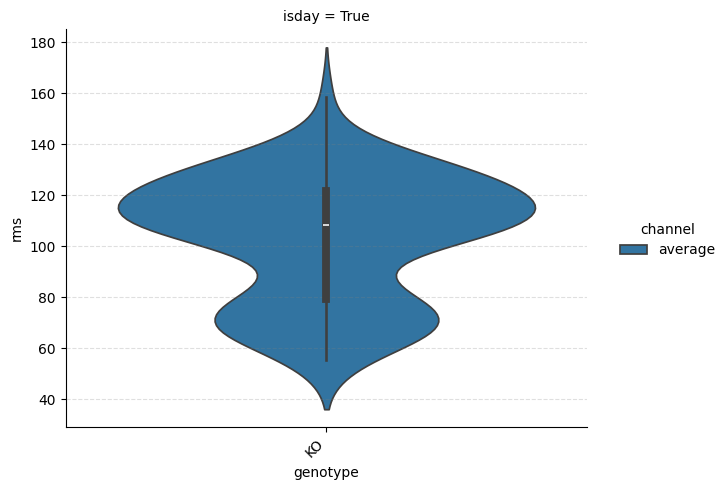

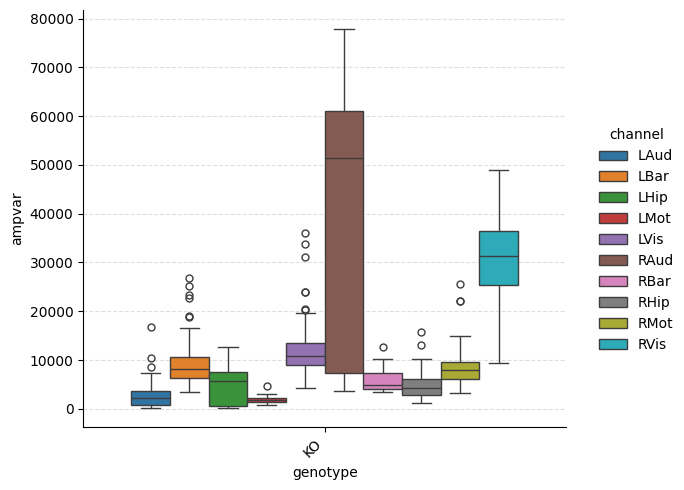

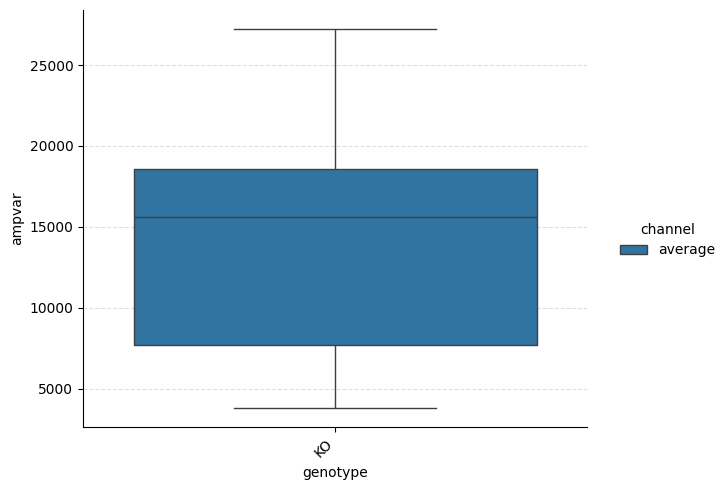

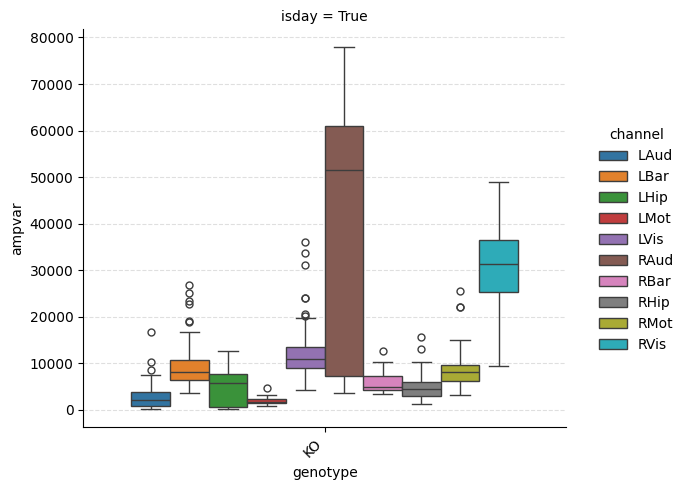

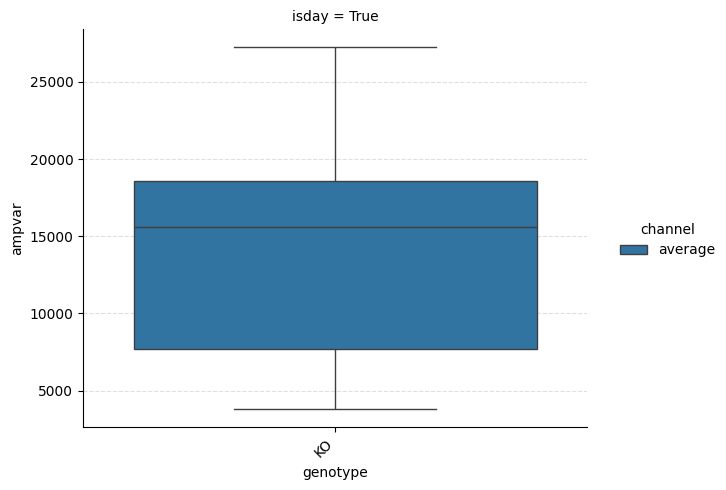

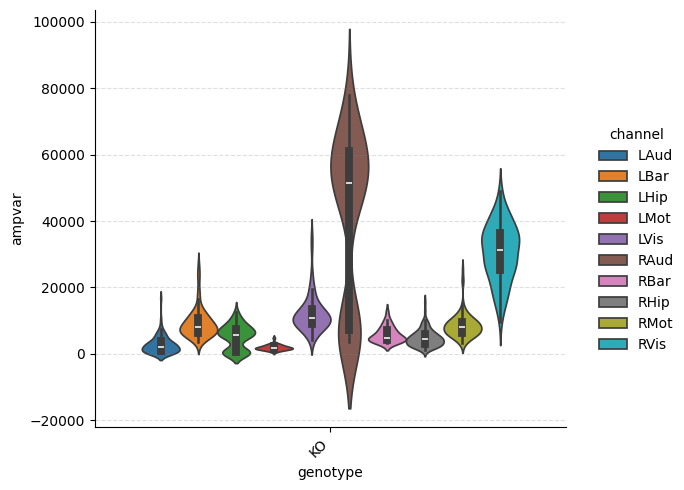

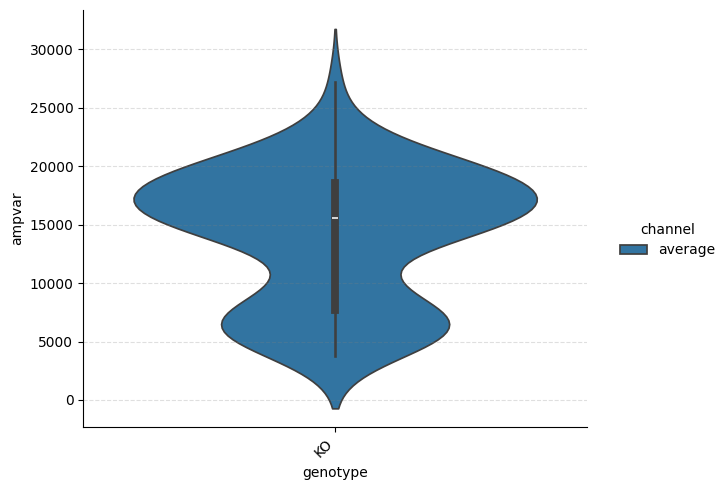

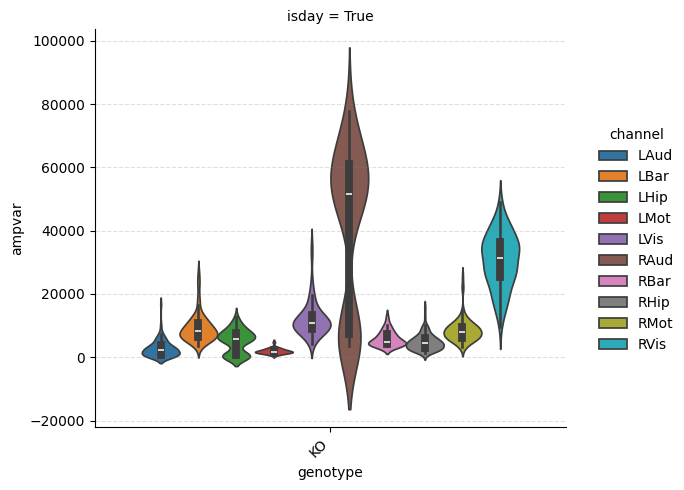

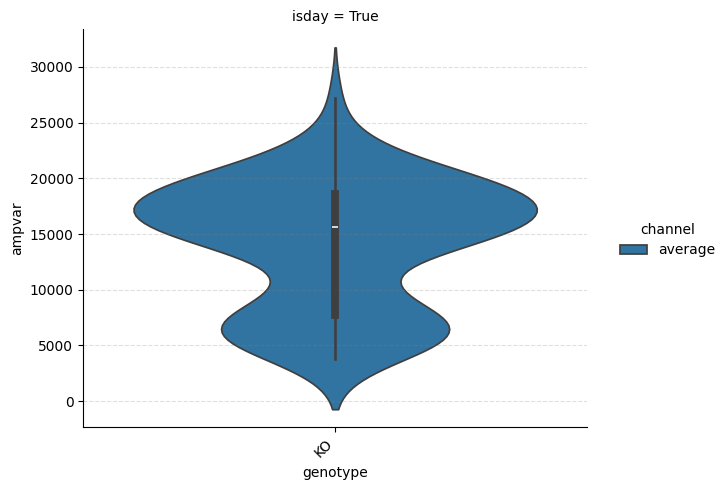

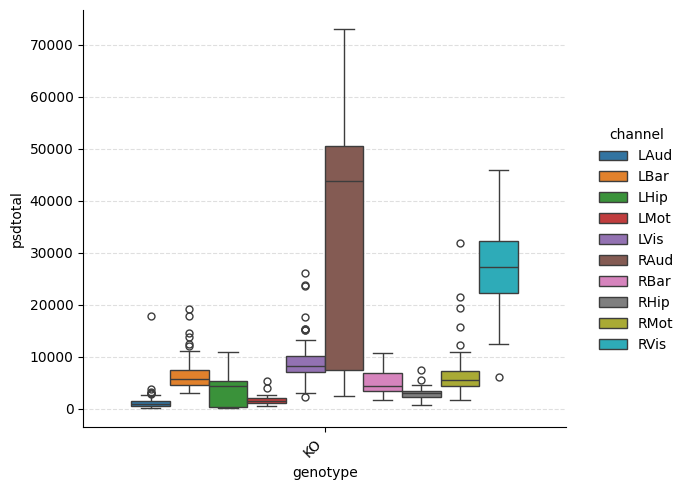

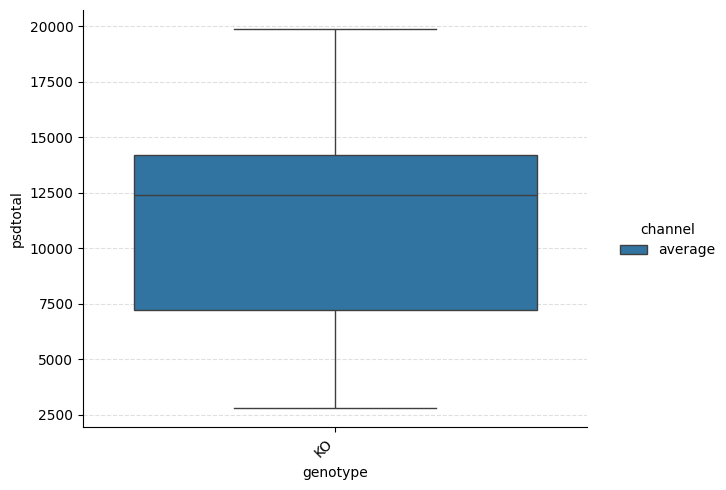

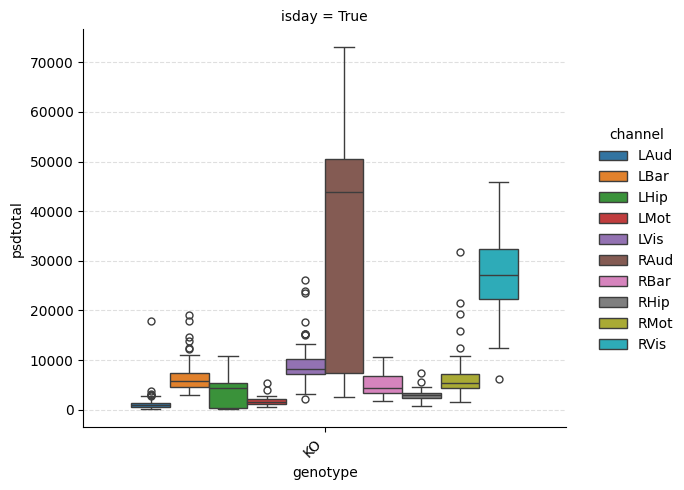

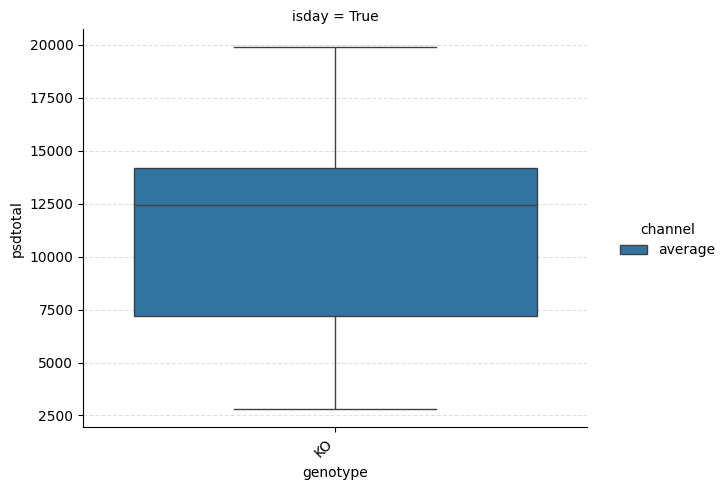

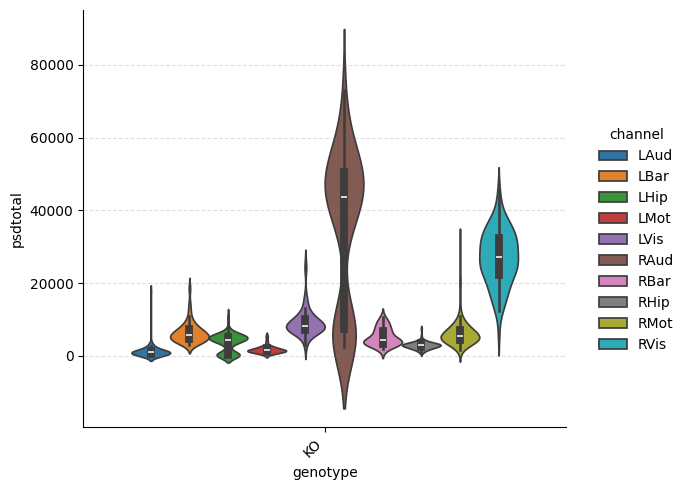

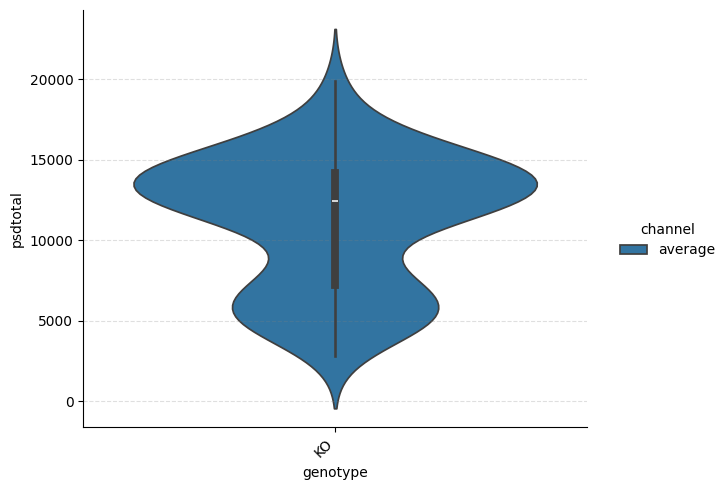

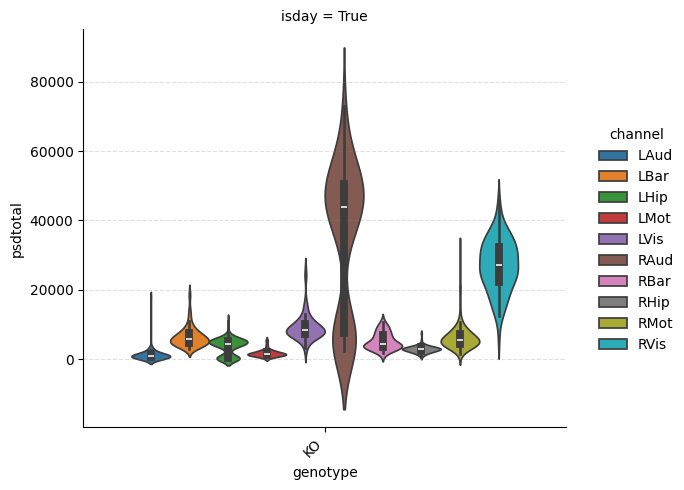

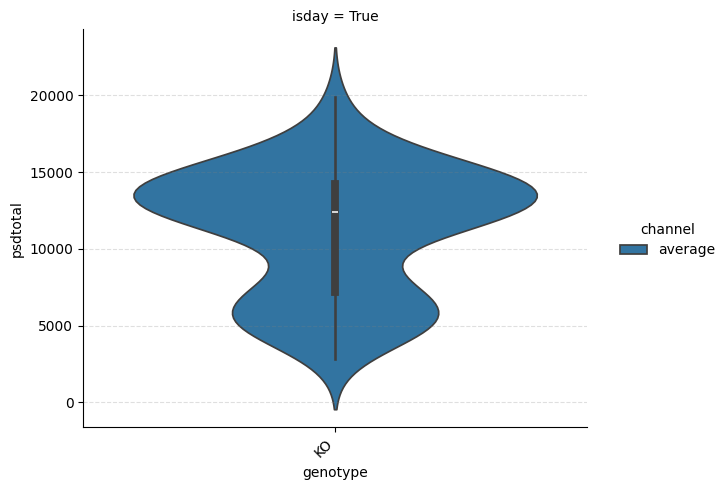

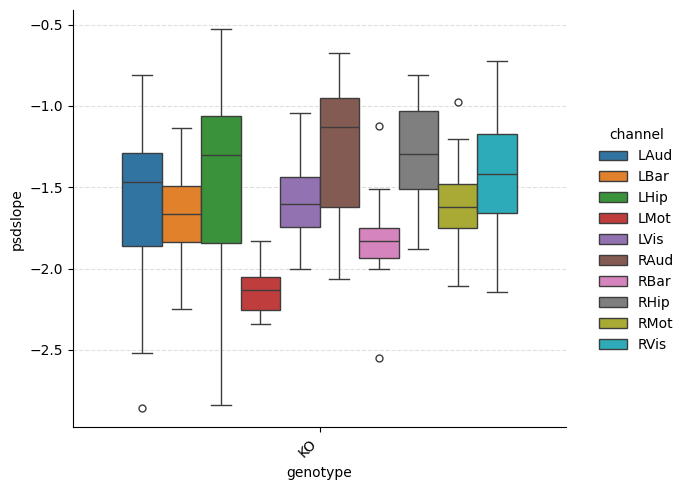

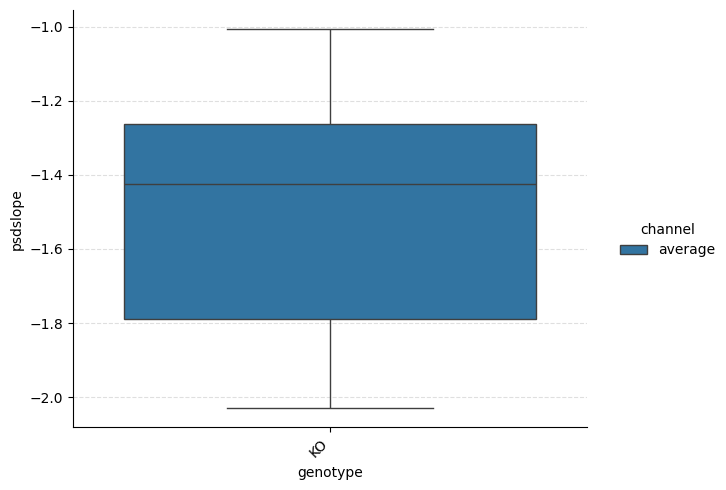

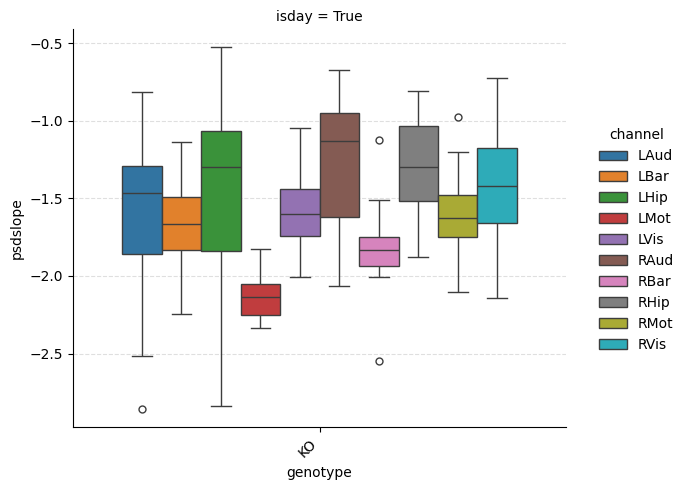

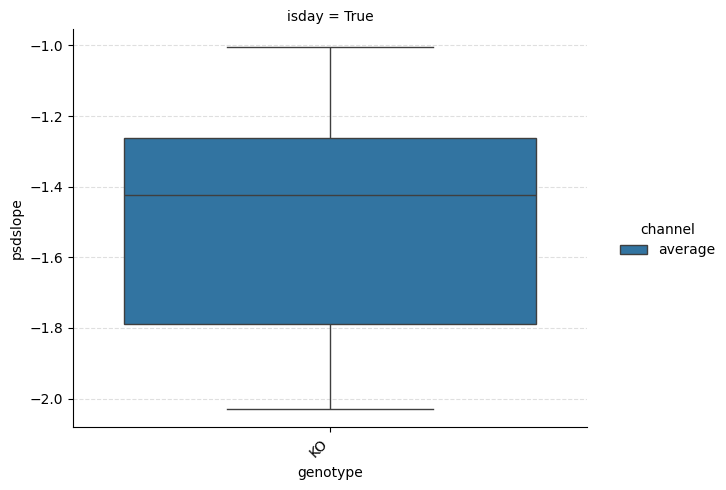

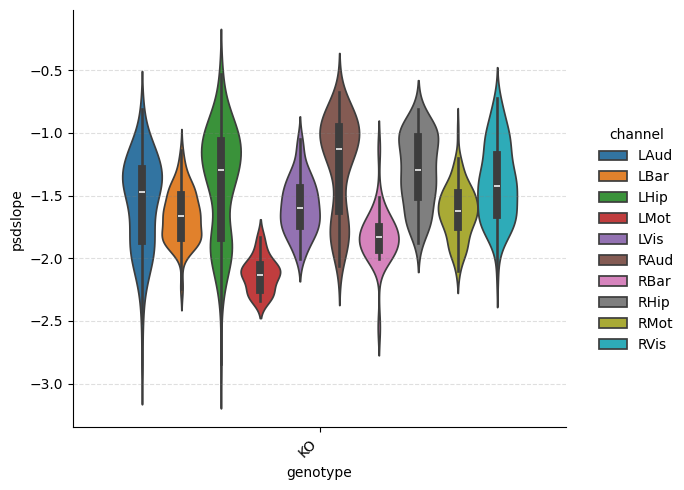

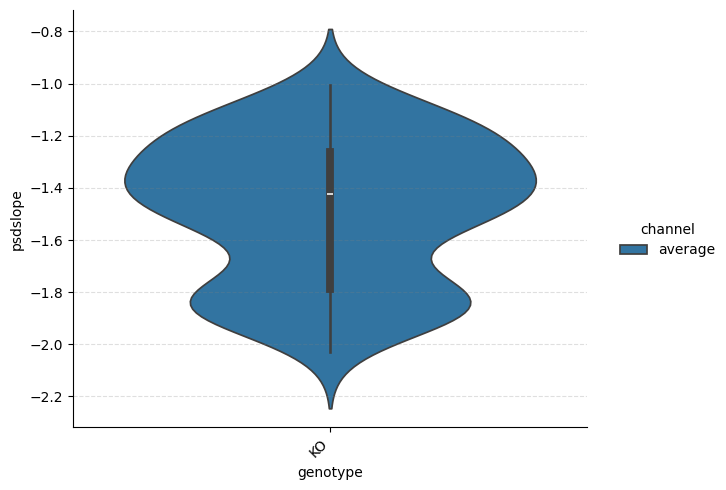

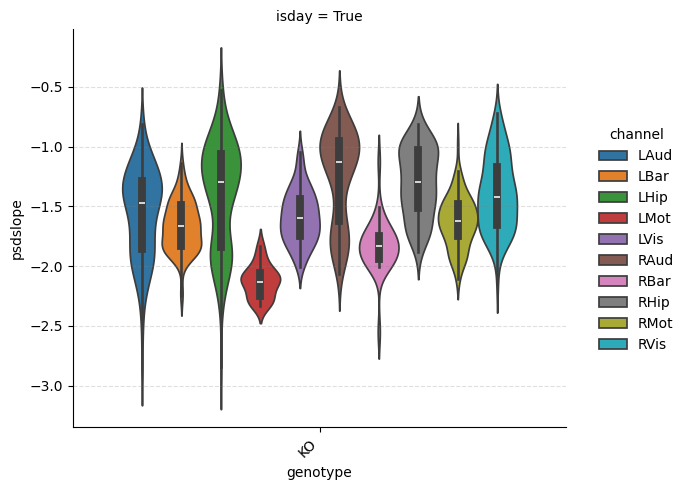

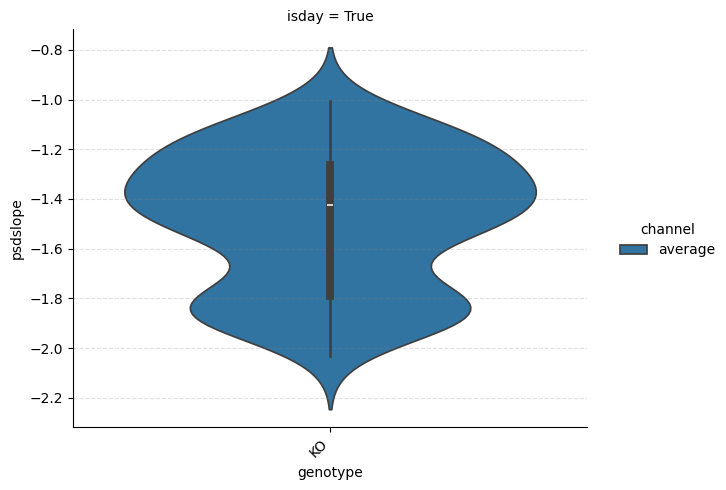

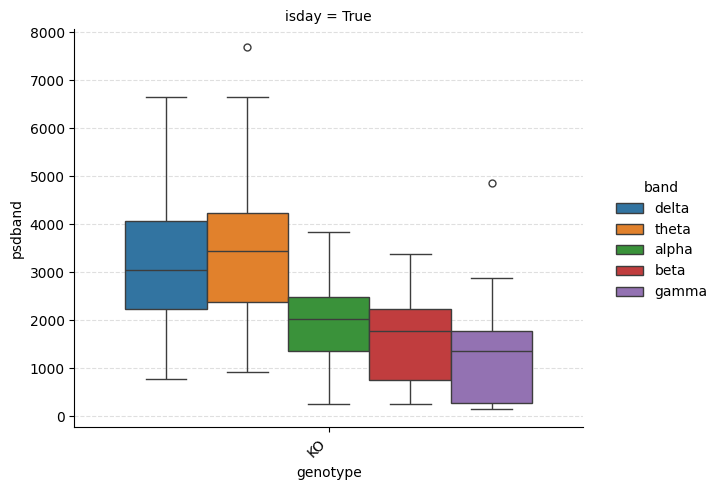

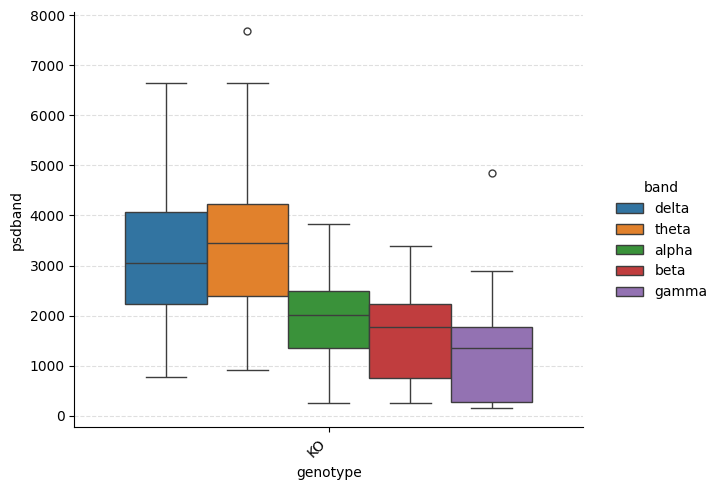

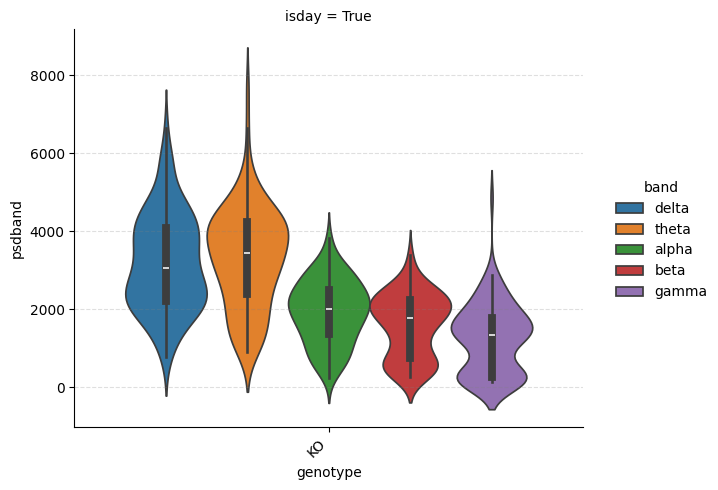

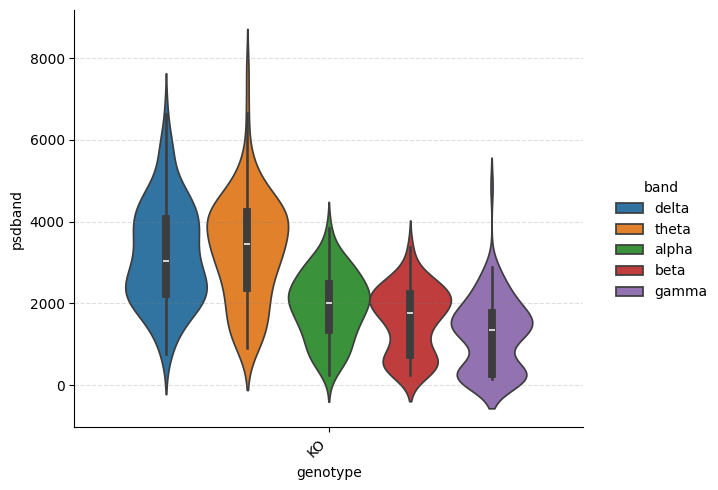

In [33]:
for feature in constants.LINEAR_FEATURE:
    for kind in ['box', 'violin']:
        for groupby in ['genotype', ['genotype', 'isday']]:
            for collapse in [False, True]:
                ep.plot_catplot(feature, groupby=groupby, kind=kind, collapse_channels=collapse)
for kind in ['box', 'violin']:
    ep.plot_catplot('psdband', groupby=['genotype', 'isday'], 
                    x='genotype',
                    col='isday',
                    hue='band',
                    kind=kind, collapse_channels=True)
    ep.plot_catplot('psdband', groupby=['genotype'], 
                    x='genotype',
                    hue='band',
                    kind=kind, collapse_channels=True)

2025-03-28 03:34:26,859 - DEBUG - groups: ['A10', 'F22']
2025-03-28 03:34:26,860 - DEBUG - vals.shape: (31, 10)
2025-03-28 03:34:26,862 - DEBUG - vals.shape: (117, 10)


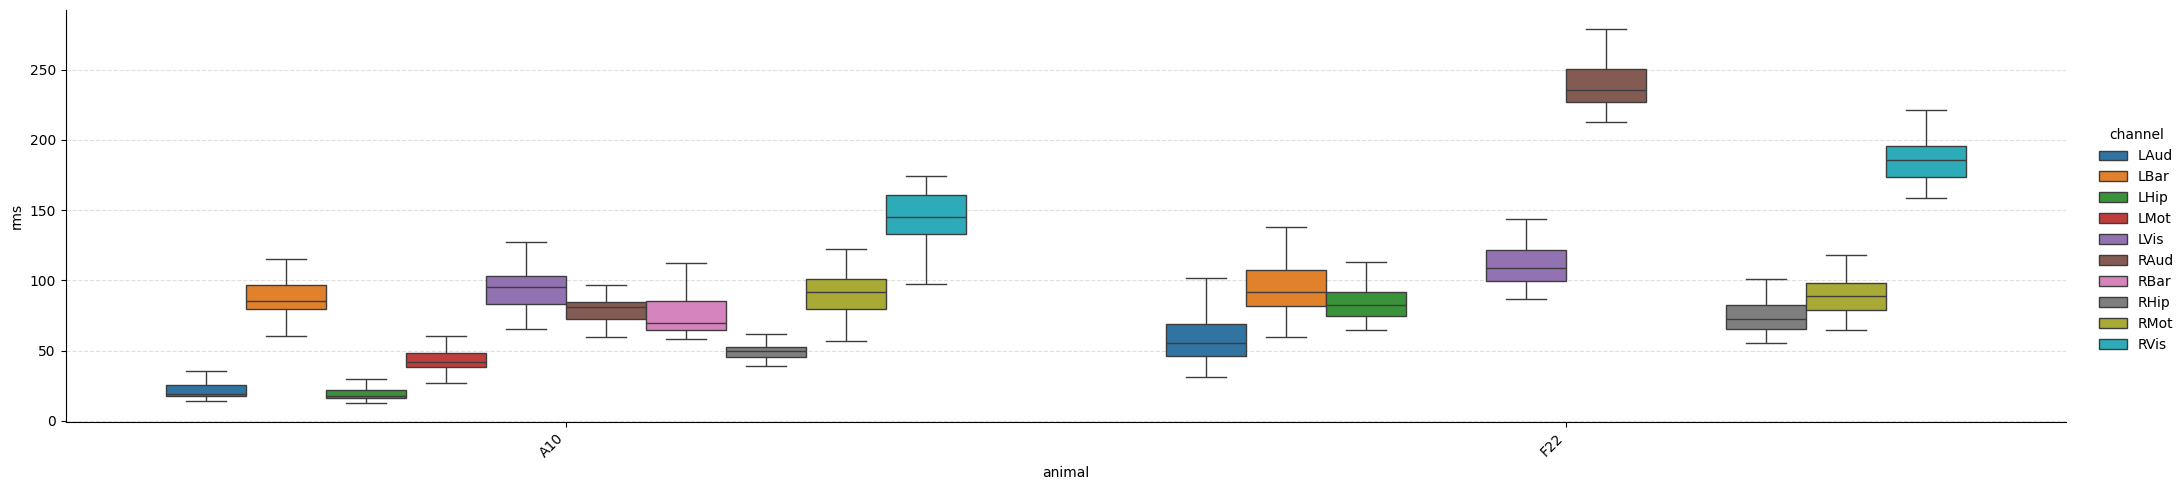

In [43]:
ep.plot_catplot('rms', groupby='animal', kind='box', catplot_params={'showfliers': False, 'aspect': 4})

2025-03-28 02:56:03,155 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x140f7b7c0>
2025-03-28 02:56:03,170 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x140f1e440>
2025-03-28 02:56:03,237 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x141638ca0>
2025-03-28 02:56:03,258 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x1416f3c40>
2025-03-28 02:56:03,278 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x1417cc850>


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:664: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:781: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:781: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:781: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)
/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:781: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)


2025-03-28 02:56:03,396 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x1413aa4d0>
2025-03-28 02:56:03,421 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x141275990>


/Users/josephdong/PyEEG/pythoneeg/visualization/plotting/experiment.py:781: RuntimeWarning: Mean of empty slice
  avg_matrix = np.nanmean(matrices, axis=0)


(<Figure size 800x1500 with 15 Axes>,
 array([[<Axes: title={'center': 'A10'}, ylabel='delta'>,
         <Axes: title={'center': 'F22'}>],
        [<Axes: ylabel='theta'>, <Axes: >],
        [<Axes: ylabel='alpha'>, <Axes: >],
        [<Axes: ylabel='beta'>, <Axes: >],
        [<Axes: ylabel='gamma'>, <Axes: >]], dtype=object),
 None)

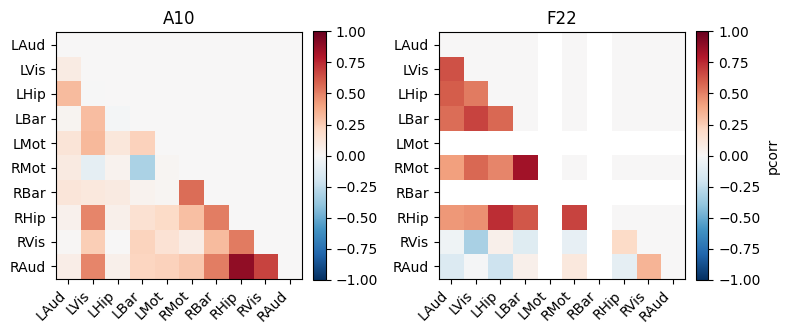

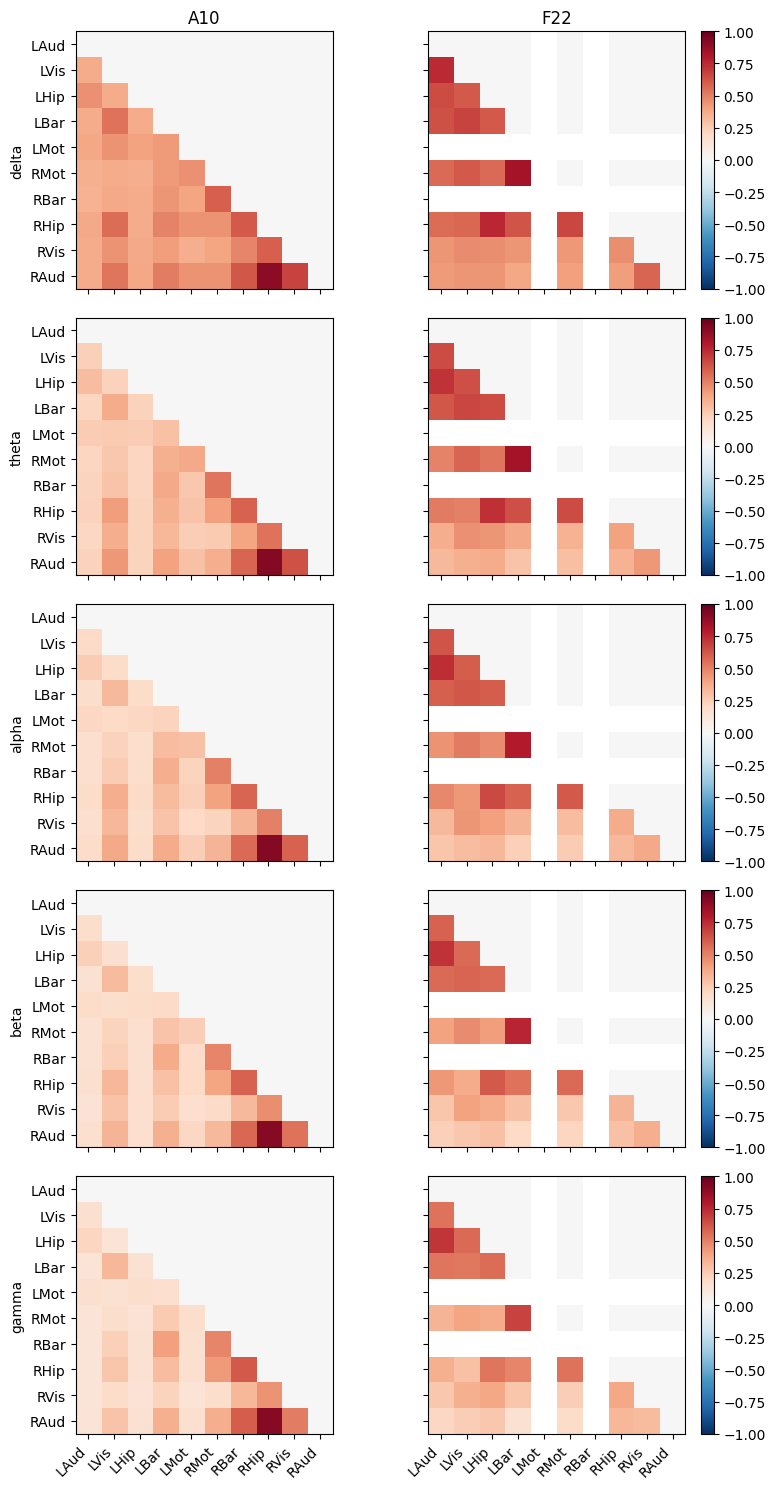

In [ ]:
ep.plot_2d_feature('pcorr', xgroup='animal')
ep.plot_2d_feature_freq('cohere', xgroup='animal')

In [16]:
logger.setLevel(logging.DEBUG)

In [ ]:
for e in sar:
    e.convert_to_mne(chunk_len=1440)
    e.save_fif_and_json(Path(f'./test-mnes/{e.animal_day}').resolve(), overwrite=True)

NameError: name 'sar' is not defined

In [17]:
reconstruct_sas = visualization.SpikeAnalysisResult.load_fif_and_json('./test-mnes/A5 WT Dec-12-2023')
mne_obj = reconstruct_sas.result_mne

Opening raw data file test-mnes/A5 WT Dec-12-2023/A5-WT-A5 WT Dec-12-2023-raw.fif...
    Reading extended channel information
Isotrak not found
    Range : 0 ... 40067758 =      0.000 ... 40067.758 secs
Ready.
2025-03-21 21:23:35,173 - INFO - Channel names: 	['Intan Input (1)/PortB L Aud Ctx', 'Intan Input (1)/PortB L Vis Ctx', 'Intan Input (1)/PortB L Hipp', 'Intan Input (1)/PortB L Barrel', 'Intan Input (1)/PortB L Motor', 'Intan Input (1)/PortB R Motor', 'Intan Input (1)/PortB R Barrel', 'Intan Input (1)/PortB R Hipp', 'Intan Input (1)/PortB R Vis Ctx', 'Intan Input (1)/PortB R Aud Ctx']
2025-03-21 21:23:35,174 - INFO - Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']


Used Annotations descriptions: [np.str_('Intan Input (1)/PortB L Aud Ctx'), np.str_('Intan Input (1)/PortB L Barrel'), np.str_('Intan Input (1)/PortB L Hipp'), np.str_('Intan Input (1)/PortB L Motor'), np.str_('Intan Input (1)/PortB L Vis Ctx'), np.str_('Intan Input (1)/PortB R Aud Ctx'), np.str_('Intan Input (1)/PortB R Barrel'), np.str_('Intan Input (1)/PortB R Hipp'), np.str_('Intan Input (1)/PortB R Motor'), np.str_('Intan Input (1)/PortB R Vis Ctx')]


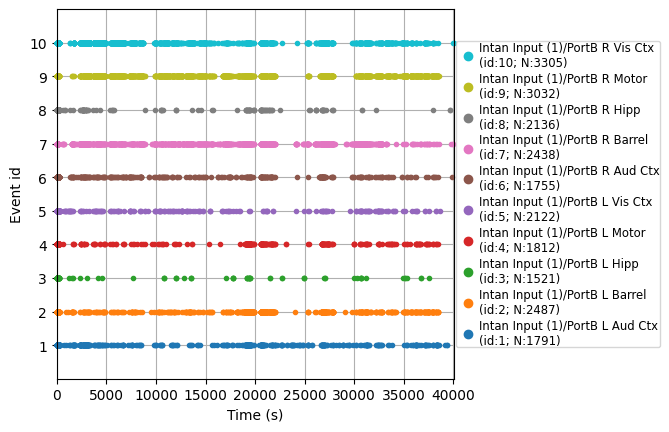

In [18]:
logger.setLevel(logging.WARNING)
events, event_id = mne.events_from_annotations(raw=mne_obj)
fig = mne.viz.plot_events(events, sfreq=mne_obj.info['sfreq'], first_samp=mne_obj.first_samp, event_id=event_id)